In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing data set

In [2]:
df=pd.read_csv('temperature.csv')

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

In [5]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

we can see that data type of date is wrong. we want to convert.

In [7]:
import datetime as dt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [8]:
# checking the null values
df.isnull().sum()

station              2
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

we see that there is nulls present in the above 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7752 non-null   int64  
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [10]:
# dropping all null values by using dropna method
df=df.dropna()

In [11]:
# checking the null values after dropping
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

no null values present

In [12]:
df.shape#after  dropping

(7588, 25)

# Exploratory Data Analysis(EDA):

In [13]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,735806.765419,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,515.727700,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,735049.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,735429.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,735808.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,736190.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,736571.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


1)all columns have equal value count.
2)we can observe some columns have mean greater than median which means data is right skeweed.

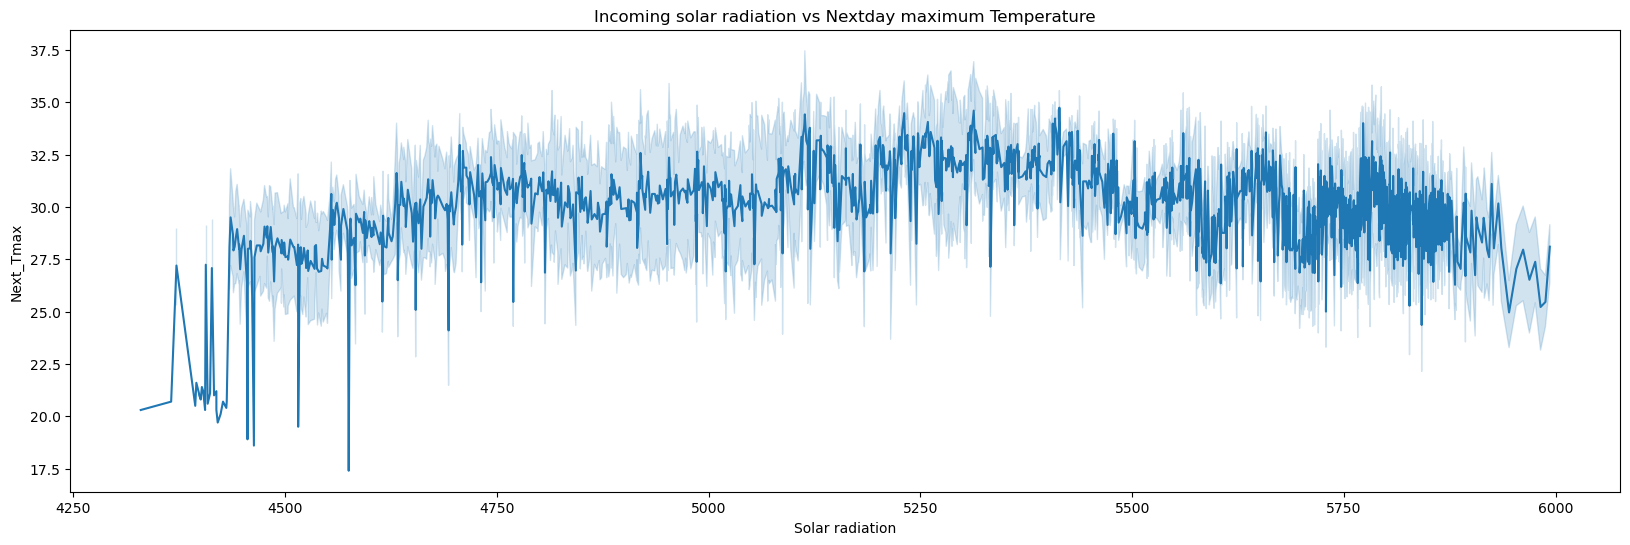

In [14]:
# comparing between incoming solar radiation VS Next day max Temperature
plt.figure(figsize=(20,6))
plt.title('Incoming solar radiation vs Nextday maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

 we can see that the next day maximum temperature is frequently increases.

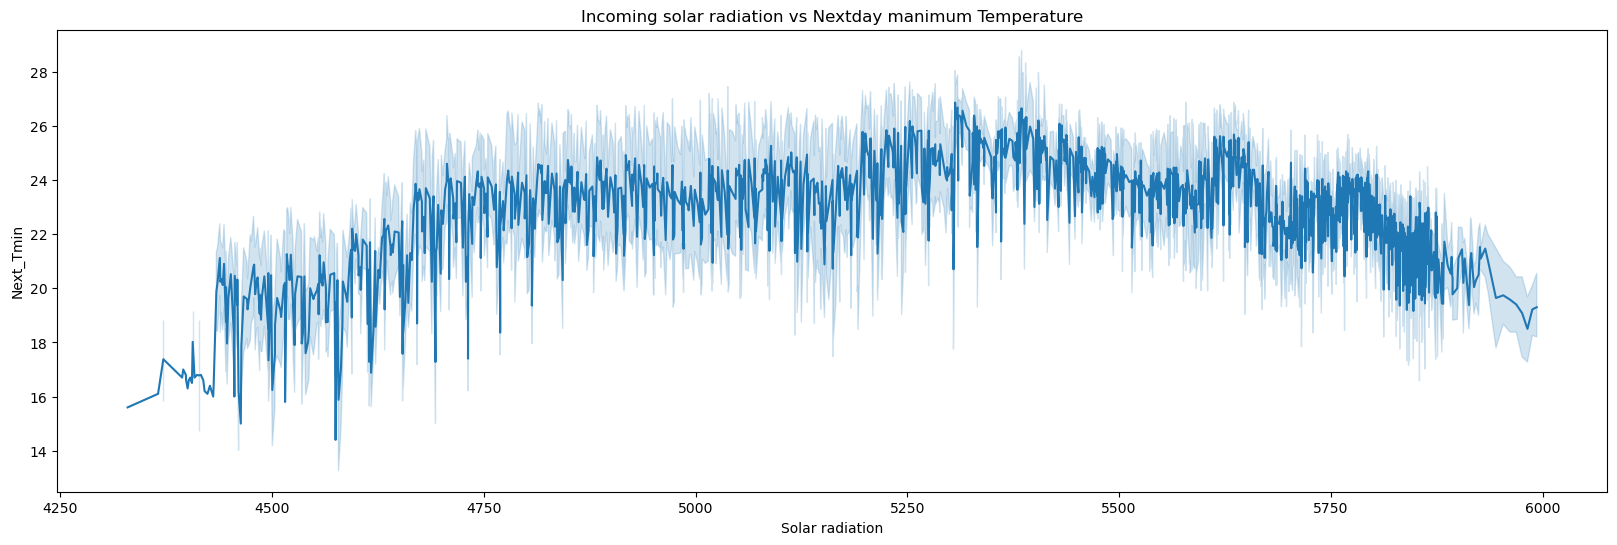

In [15]:
# comparing between incoming solar radiation VS Next day min Temperature
plt.figure(figsize=(20,6))
plt.title('Incoming solar radiation vs Nextday manimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

 we can see that the next day manimum temperature is frequently increases at certain point.

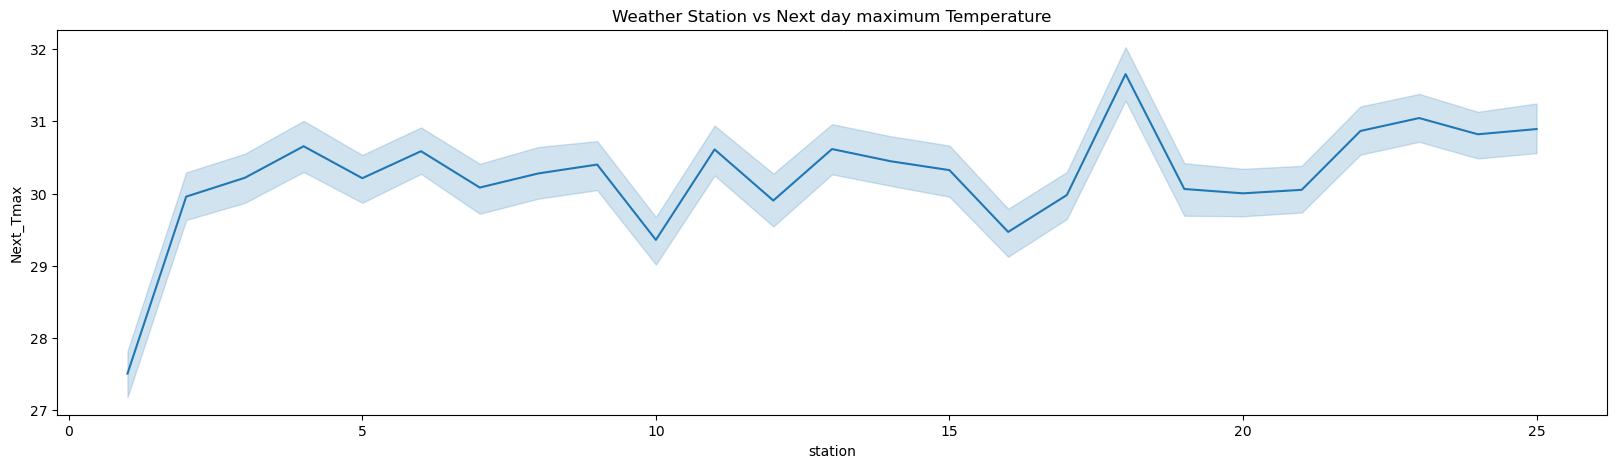

In [16]:
# comparing between weather station and next day maximum temperature
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

we can see that,the line plot clears that next day maximum temparature is high & low at station 18 & 10.

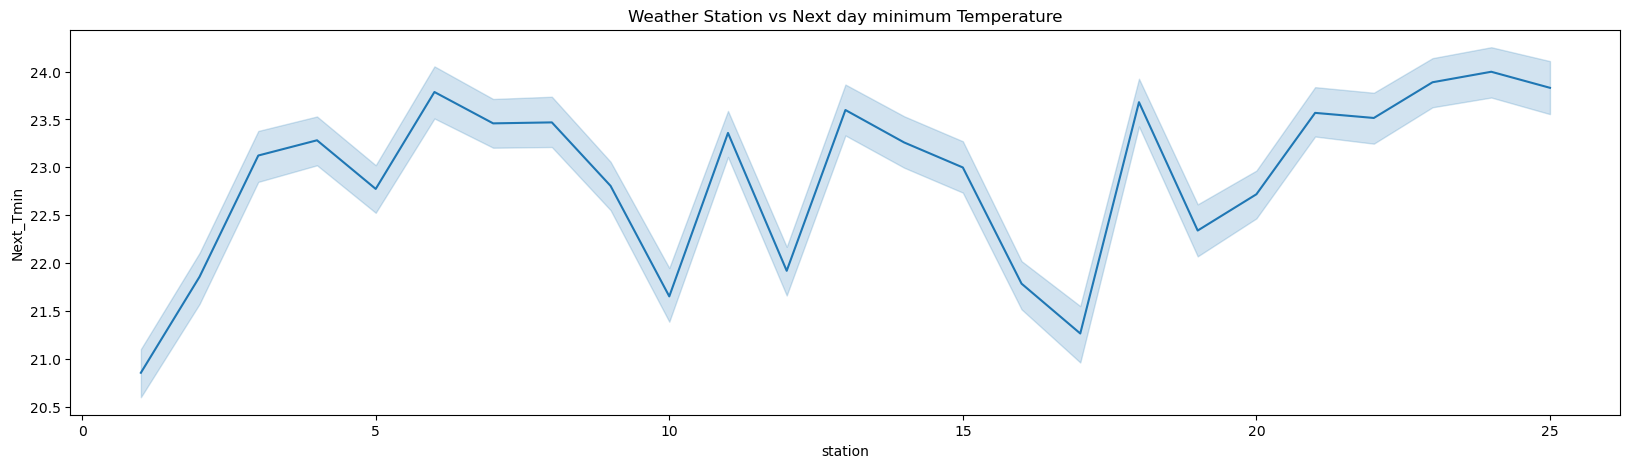

In [17]:
# comparing between weather station vs next day minimum Temperature
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

 we can see that,the line plot clears that next day minimum temparature is high & low at station 18 & 17 respectively.

Text(0, 0.5, 'Next_Tmin')

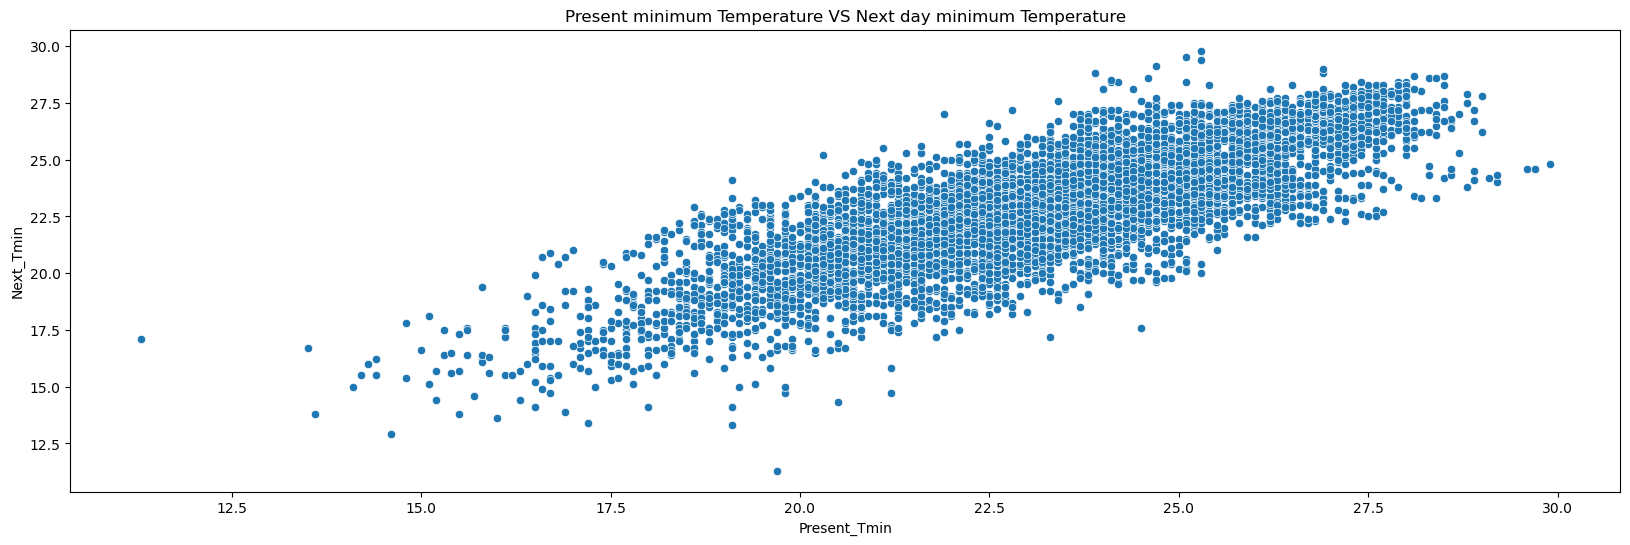

In [18]:
#Distribution data between Present minimun Temperature  vs Next day minimum Temperature.
plt.figure(figsize=(20,6))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
sns.scatterplot(x=df['Present_Tmin'], y=df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

we can see that present time is decreasing next_time is also decreasing both are correleted.

Text(0, 0.5, 'Next_Tmax')

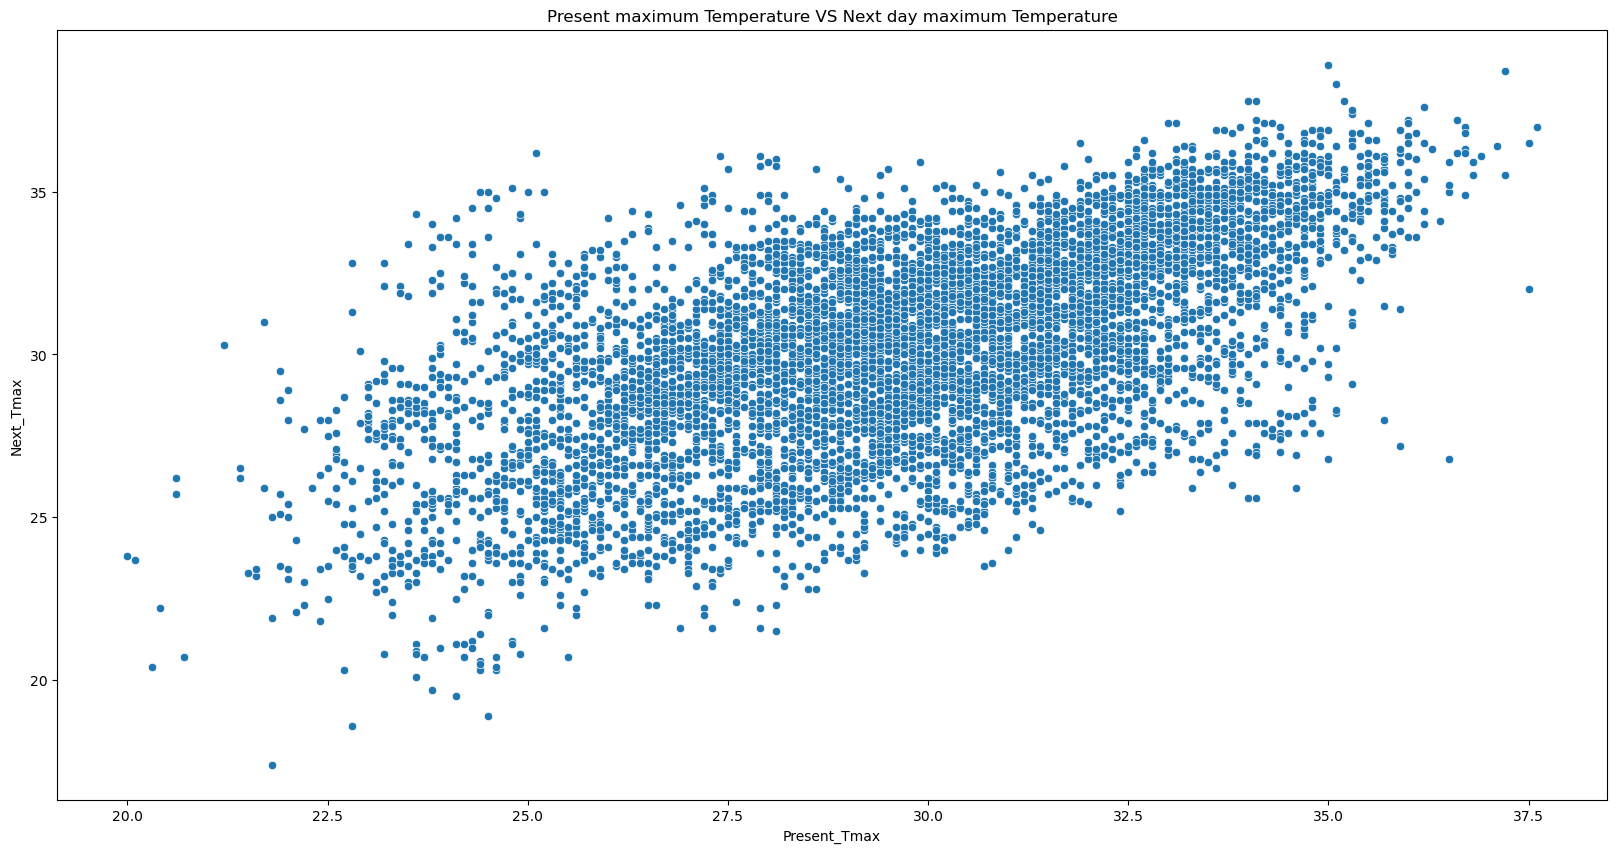

In [19]:
#Distribution data between Present maximum temperaturevs Next day maximum Temperature
plt.figure(figsize=(20,10))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
sns.scatterplot(x=df['Present_Tmax'],y=df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

<Axes: title={'center': 'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

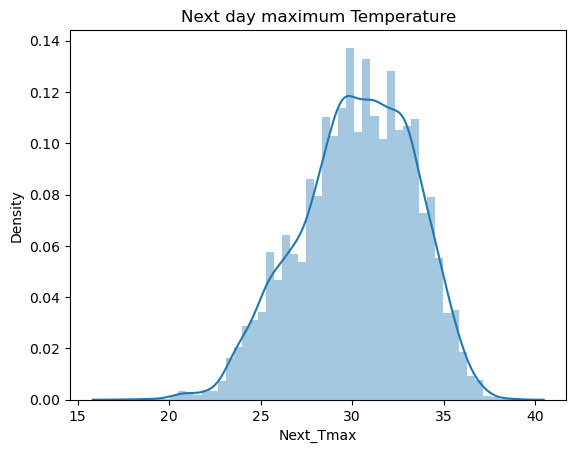

In [20]:
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

The distribution plot says that next day maximum temperature distribution is lies between 25 to 35.

<Axes: title={'center': 'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

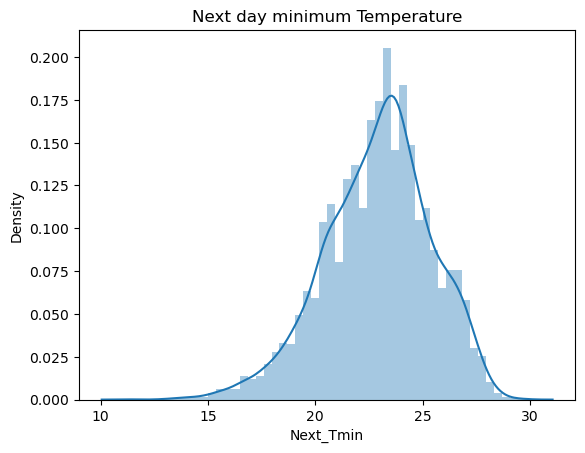

In [21]:
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

The distribution plot says that next day minimum temperature distribution is lies between 20 to 27.

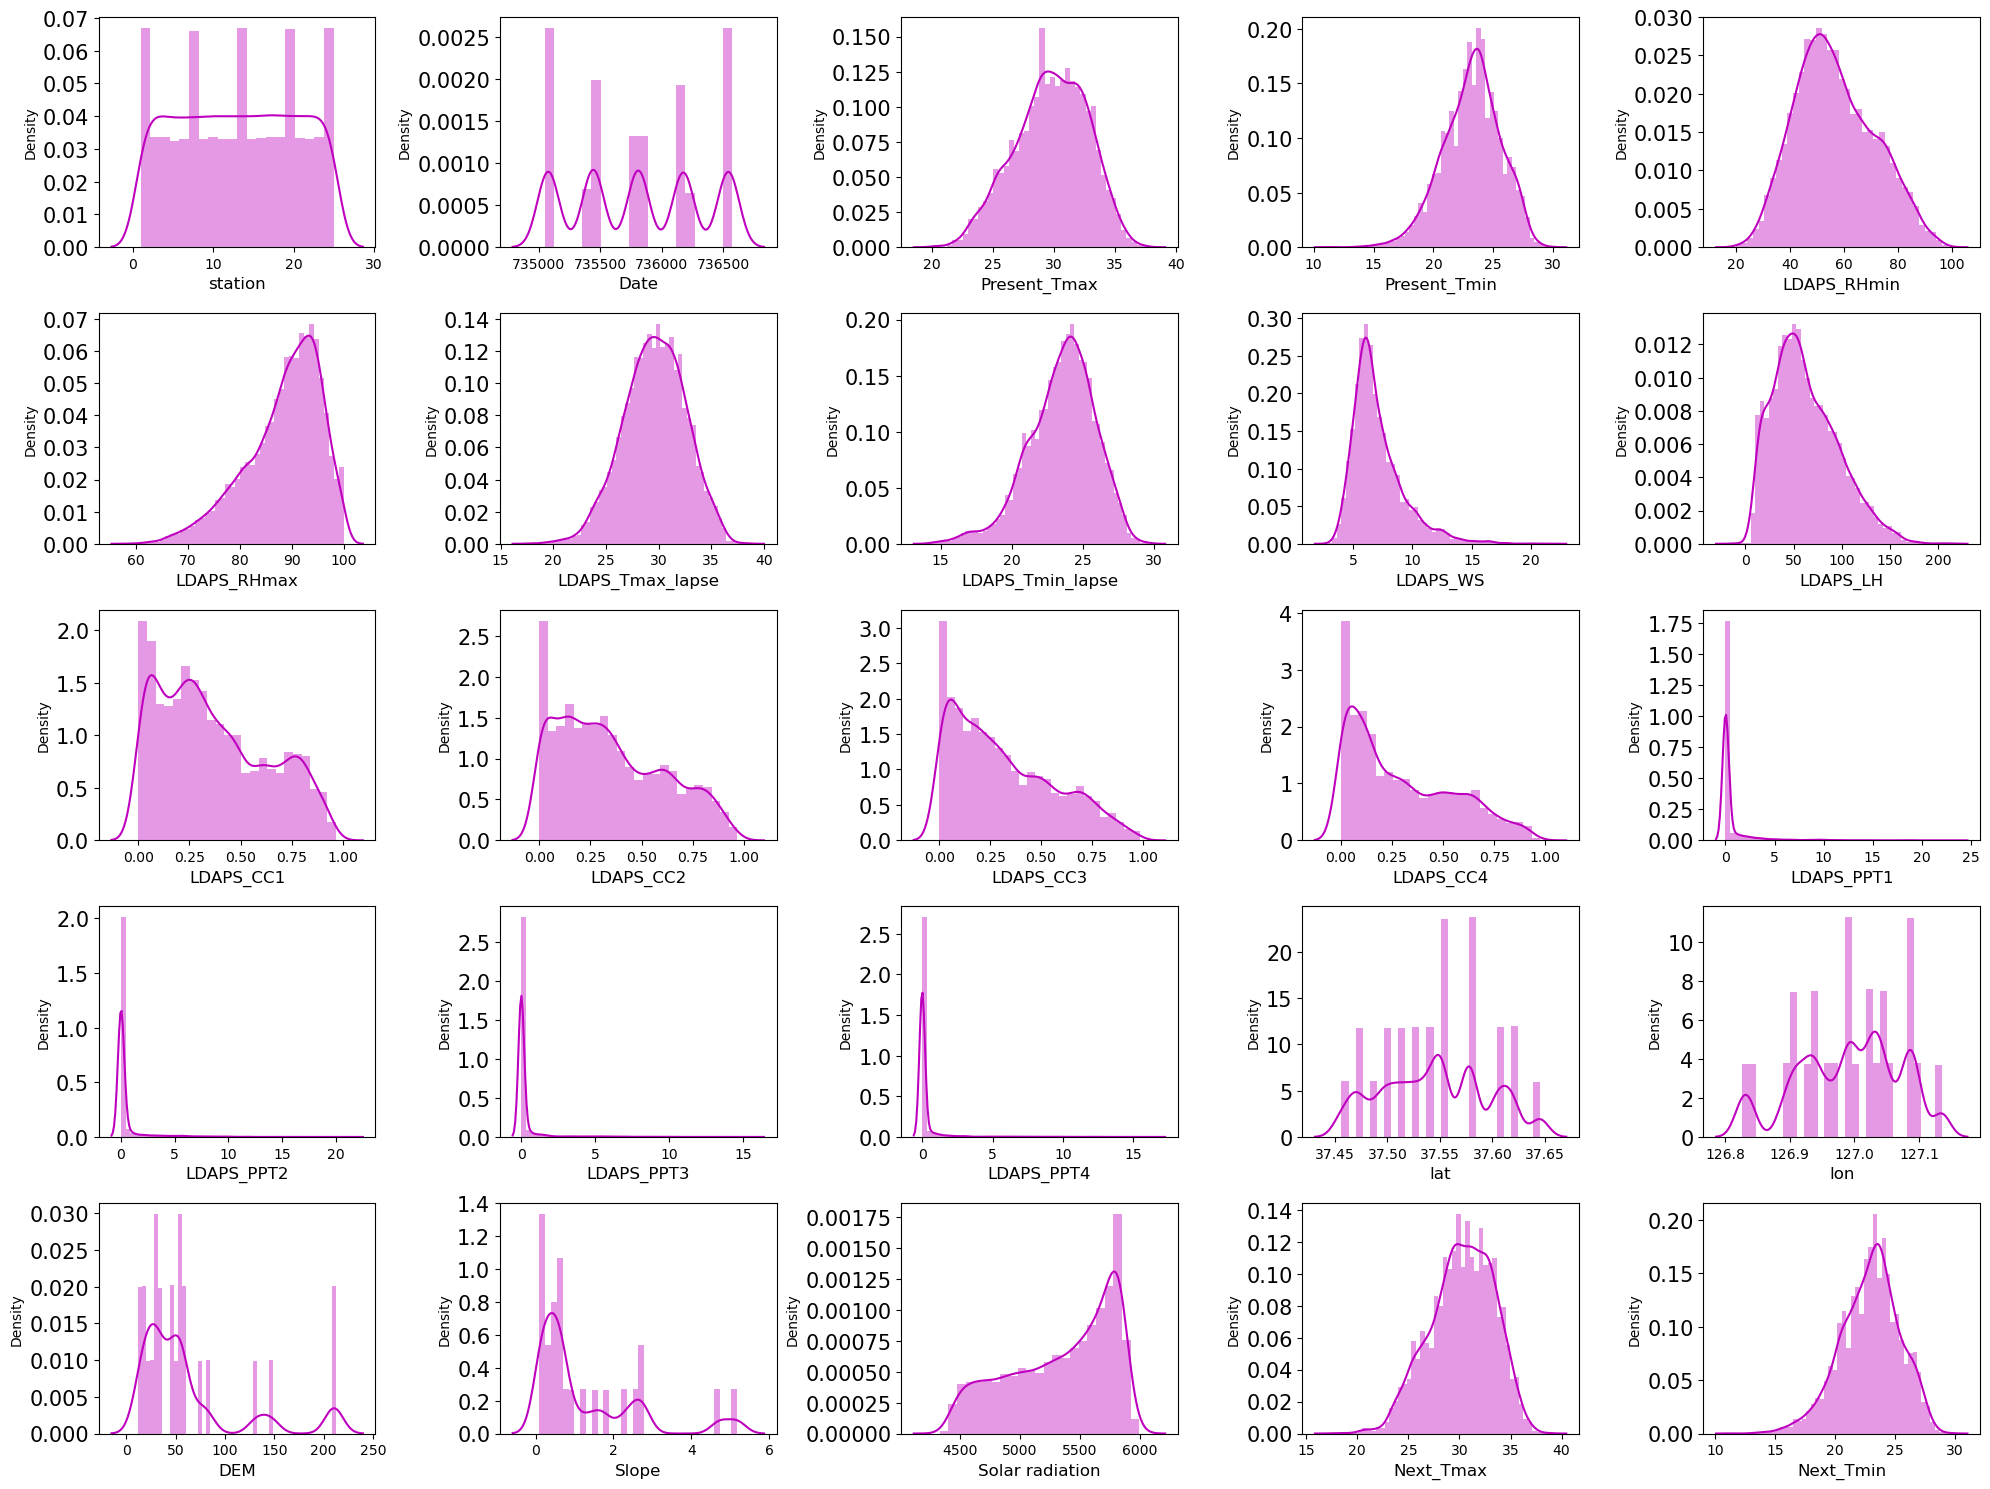

In [22]:
#CHECKING THE DISTRIBUTION
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1
for col in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5, plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=15)
    plotnumber+=1
plt.tight_layout()   

1)we can observe that most of columns are right skeweed means positively distributed. And some columns are left skeweed means negative distribution
2)Target columns has normal distibution.

Detecting outliers

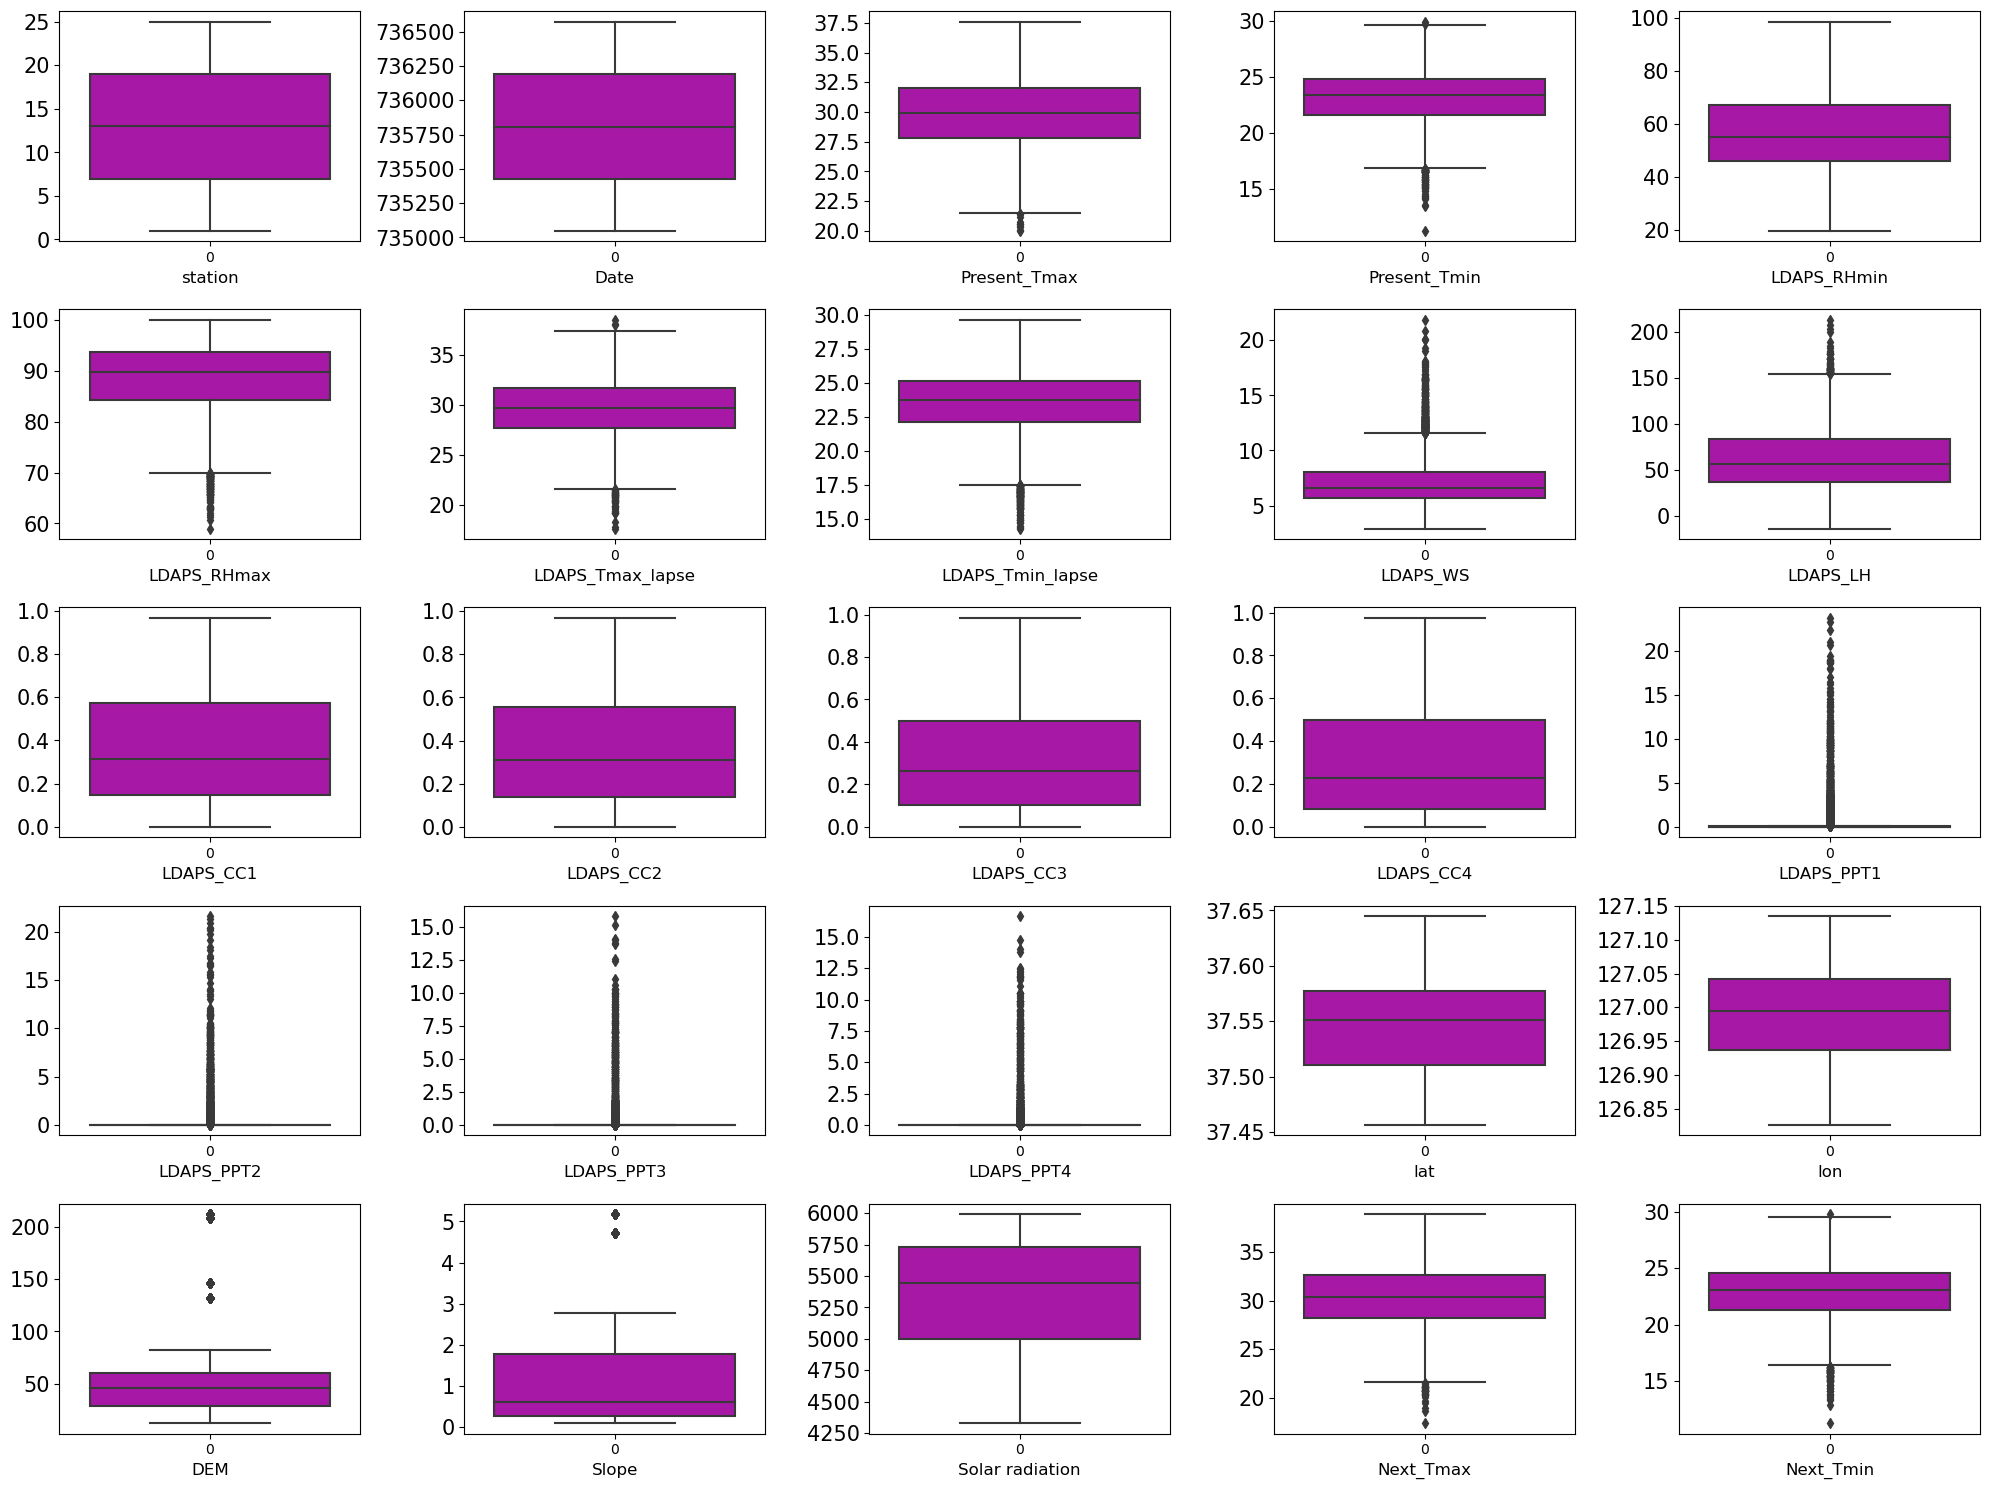

In [23]:
# visulizing the outliers by boxplot
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1
for col in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5, plotnumber)
        sns.boxplot(df[col], color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=15)
    plotnumber+=1
plt.tight_layout()   

we can clearly observe that there are outliers in most of columns.

In [24]:
#REMOVING THE OUTLIERS DATA BY USING Z SCORE METHOD
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))


In [25]:
#threesold=3
np.where(z>3)

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64),
 array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))

In [26]:
z.iloc[25,8]

3.911059950709196

In [27]:
#removoing the dataabove zscore and creating new df
df1=df[(z<3).all(axis=1)]
df1.shape

(6739, 25)

In [28]:
#shape of old and new data
print("old data frame.--",df.shape[0])
print("new data frame.--",df1.shape[0])

old data frame.-- 7588
new data frame.-- 6739


In [29]:
print("data loss percentage--", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage-- 11.188719030047443


In [30]:
df1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,736571,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,736571,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,736571,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,736571,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [31]:
df=df1

In [32]:
#check the correlation between features vs features and target vs features
cor = df.corr()
cor

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.007112,0.110291,0.133638,-0.069582,-0.176388,0.066863,0.104401,0.023075,-0.135023,...,-0.021036,0.002851,0.015223,-0.241811,-0.122829,-0.257894,-0.096863,-0.032810,0.106378,0.129110
Date,0.007112,1.000000,0.102417,0.101325,-0.005243,-0.144391,0.068164,0.050596,-0.140379,0.070202,...,-0.050679,0.023438,0.059801,0.001149,-0.006215,0.003105,0.002602,-0.002528,0.103587,0.069442
Present_Tmax,0.110291,0.102417,1.000000,0.610428,-0.154266,-0.297804,0.540680,0.616886,-0.105162,0.130771,...,-0.040151,-0.015137,-0.042837,-0.052041,0.011132,-0.168792,-0.091336,-0.059891,0.586943,0.615950
Present_Tmin,0.133638,0.101325,0.610428,1.000000,0.151385,-0.039688,0.441577,0.764258,0.018711,-0.004055,...,0.084705,0.036206,-0.055364,-0.072707,-0.043201,-0.241396,-0.138107,0.020030,0.438813,0.785946
LDAPS_RHmin,-0.069582,-0.005243,-0.154266,0.151385,1.000000,0.552581,-0.555583,0.129481,0.236324,-0.035217,...,0.376428,0.257765,0.185176,0.090054,-0.093969,0.094391,0.119216,0.251733,-0.433872,0.134518
LDAPS_RHmax,-0.176388,-0.144391,-0.297804,-0.039688,0.552581,1.000000,-0.385695,-0.142575,0.094523,0.274590,...,0.225832,0.120010,0.106028,0.200216,0.018945,0.172348,0.218465,0.153673,-0.301797,-0.097490
LDAPS_Tmax_lapse,0.066863,0.068164,0.540680,0.441577,-0.555583,-0.385695,1.000000,0.621299,-0.229614,0.036340,...,-0.237892,-0.141172,-0.160177,-0.038285,0.106354,-0.162061,-0.148246,0.012974,0.816861,0.553227
LDAPS_Tmin_lapse,0.104401,0.050596,0.616886,0.764258,0.129481,-0.142575,0.621299,1.000000,-0.052648,-0.135842,...,0.012282,0.012854,-0.081221,-0.090587,-0.024177,-0.177845,-0.172382,0.106033,0.546479,0.875382
LDAPS_WS,0.023075,-0.140379,-0.105162,0.018711,0.236324,0.094523,-0.229614,-0.052648,1.000000,-0.045067,...,0.115051,0.121172,0.196309,-0.014440,-0.077116,0.150448,0.118546,0.136180,-0.277823,-0.013668
LDAPS_LH,-0.135023,0.070202,0.130771,-0.004055,-0.035217,0.274590,0.036340,-0.135842,-0.045067,1.000000,...,-0.066290,0.010732,0.038641,0.124764,0.021578,0.068085,0.100776,-0.031060,0.176077,-0.046540


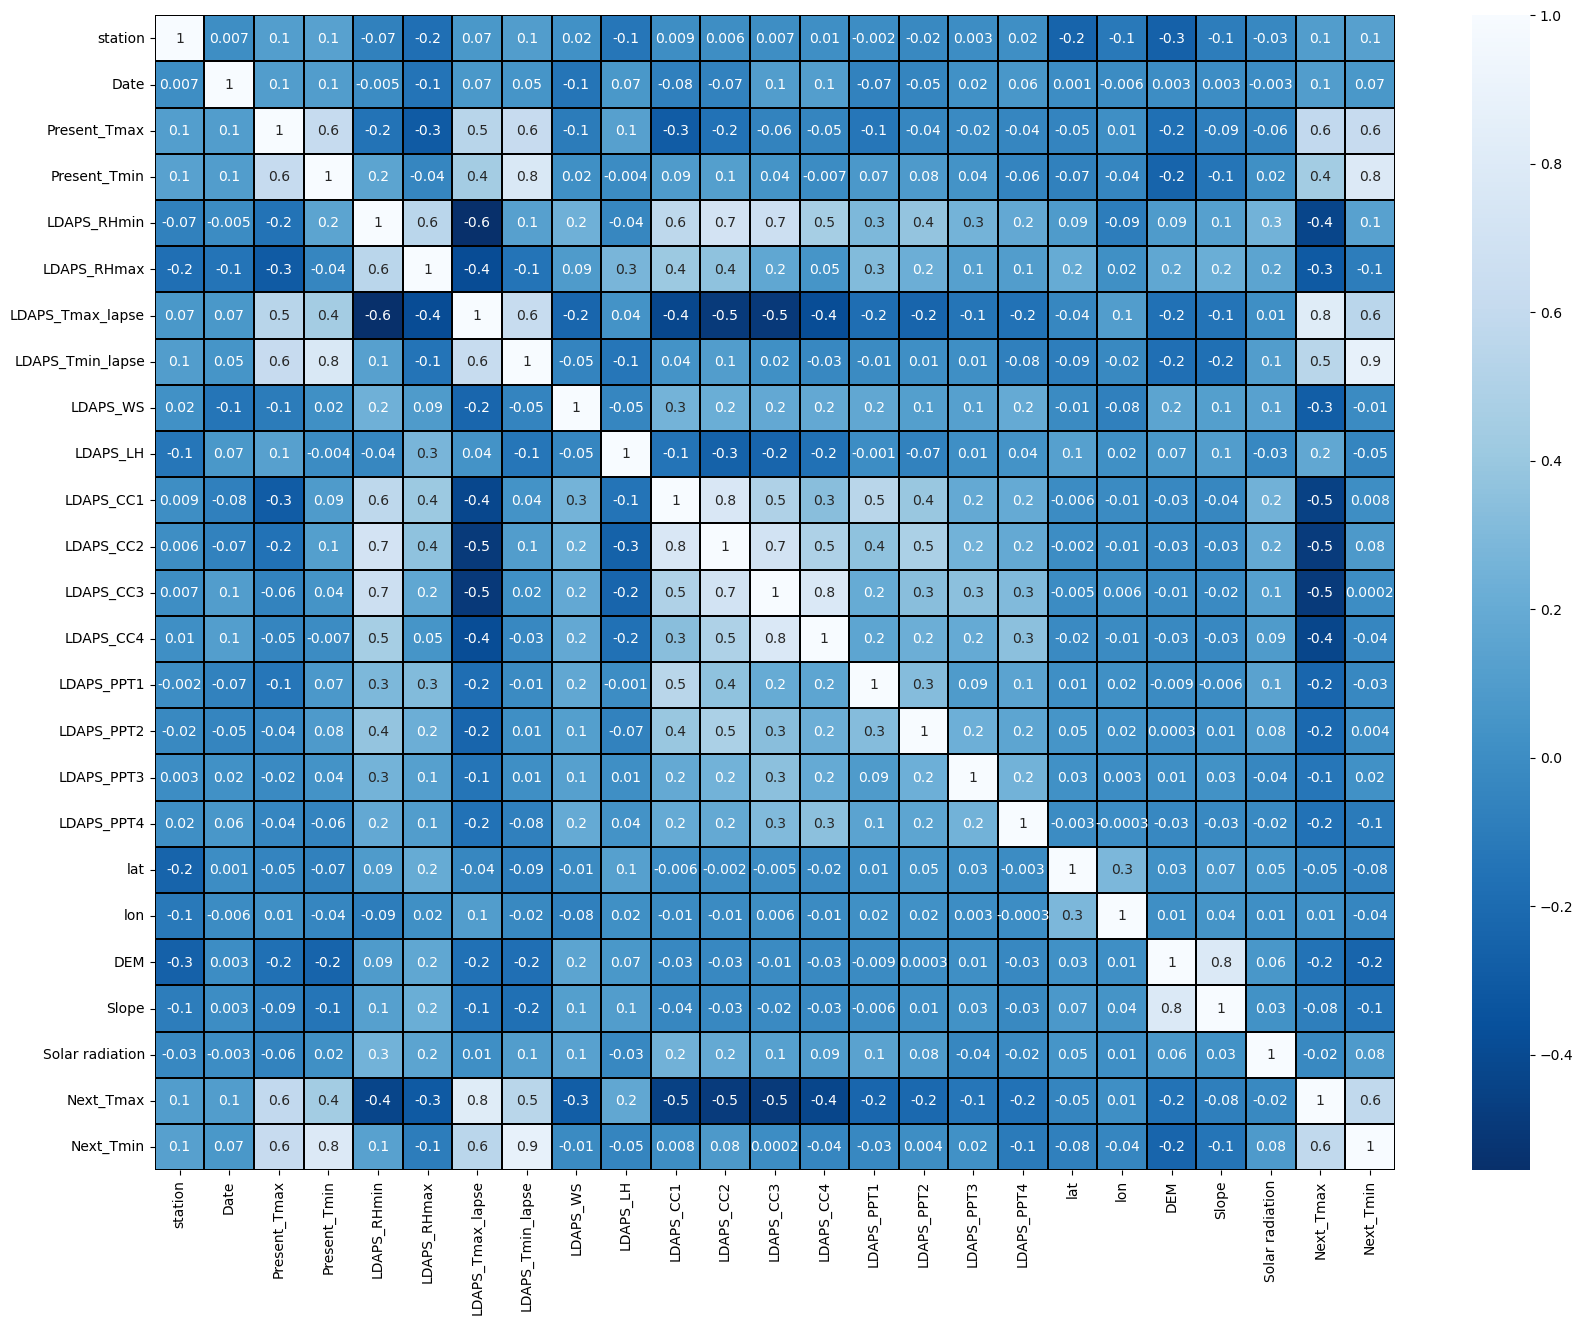

In [33]:
#by using heatmap checking the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g', linecolor="black", annot=True, cmap="Blues_r")
plt.show()

1)Next_Tmin and Next_Tmax are also highly correlated with each other.
2)LDAPS_RHmin and LDAPS_RHmax are also highly correlated with target varibles.
3)LDAPS_Tmax_lapse,LDAPS_Tmin_lapse positively correlated with present_Tmax and present_Tmin.
4)some of columns are negatively correlated with target variables.

In [34]:
#checking skewness
df.skew()

station            -0.001594
Date                0.025658
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [35]:
# removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

df.skew()

station            -0.001594
Date                0.025658
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.065308
LDAPS_CC2           0.050023
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

we can see here skewness is removed, till some skewness is there.

# ENCODING OBJECT COLUMNS

In [36]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [37]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,0.348222,28.074101,23.006936,0.176871,0.349992,...,-0.484794,-0.461889,-0.414444,37.6046,126.991,1.854393,1.327776,1.891687,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,0.261118,29.850689,24.035009,-0.574617,-0.166810,...,-0.484794,-0.461889,-0.414444,37.6046,127.032,0.069704,-0.375858,1.431077,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,-0.717348,30.091292,24.565633,-0.252083,-1.378337,...,-0.484794,-0.461889,-0.414444,37.5776,127.058,-0.353433,-0.944115,1.410511,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,1.375094,29.704629,23.326177,-0.606795,0.245926,...,-0.484794,-0.461889,-0.414444,37.6450,127.022,0.098766,1.249133,1.387059,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,0.186035,29.113934,23.486480,-0.541825,1.298111,...,-0.484794,-0.461889,-0.414444,37.5507,127.135,-0.278815,-0.392364,1.396254,31.2,22.5


## separating both variables into different part

In [38]:
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]
x = df.drop(["Next_Tmax","Next_Tmin"], axis=1)

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [40]:
x

array([[0.        , 0.        , 0.45731707, ..., 1.        , 0.86830684,
        1.        ],
       [0.04166667, 0.        , 0.65243902, ..., 0.53546159, 0.34093562,
        0.87737784],
       [0.08333333, 0.        , 0.63414634, ..., 0.42532285, 0.16502796,
        0.87190263],
       ...,
       [0.91666667, 1.        , 0.12804878, ..., 0.10694767, 0.06151636,
        0.02269543],
       [0.95833333, 1.        , 0.12804878, ..., 0.15356116, 0.12636352,
        0.02108425],
       [1.        , 1.        , 0.12195122, ..., 0.20803715, 0.16943744,
        0.02532933]])

Data have been scalled.

# Model Building: Next_Tmax

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Checking the Best Random State for Data Split

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge 
from sklearn.svm import SVR

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y1_train,y1_test = train_test_split(x,y1,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y1_train)
    predrf = LR.predict(x_test)
    score = r2_score(y1_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.7809238533356457  on Random_state  43


In [47]:
models=[LinearRegression(),DecisionTreeRegressor(),KNN(),RandomForestRegressor(),
     GradientBoostingRegressor(),SVR(),Ridge()]

In [52]:
def r2score_train_test():
    
    for model in models:
        model.fit(x_train,y1_train)
        y1_train_pred = model.predict(x_train)
        y1_test_pred =model.predict(x_test)
        
        
        print('r2 Score for the training', model, '=', r2_score(y1_train,y1_train_pred)*100)
        print('r2 Score for the testing', model, '=',  r2_score(y1_test,y1_test_pred)*100)
        print('Mean Absolute Error:', model, '=',  mean_absolute_error(y1_test,y1_test_pred))
        print('Mean Squared error:',  model,    '=', mean_squared_error(y1_test,y1_test_pred))
        print('Root Mean square Error:', model, '=',   np.sqrt(mean_squared_error(y1_test,y1_test_pred)))
        print('-'*30)       
        print("\n")
              

In [53]:
r2score_train_test()

r2 Score for the training LinearRegression() = 75.48904917442437
r2 Score for the testing LinearRegression() = 77.71801211522002
Mean Absolute Error: LinearRegression() = 1.0759917674445652
Mean Squared error: LinearRegression() = 1.9788833936094328
Root Mean square Error: LinearRegression() = 1.4067279031886133
------------------------------


r2 Score for the training DecisionTreeRegressor() = 100.0
r2 Score for the testing DecisionTreeRegressor() = 77.41057744144612
Mean Absolute Error: DecisionTreeRegressor() = 1.0155786350148368
Mean Squared error: DecisionTreeRegressor() = 2.006186943620178
Root Mean square Error: DecisionTreeRegressor() = 1.4163992882023693
------------------------------


r2 Score for the training KNeighborsRegressor() = 86.92930561834966
r2 Score for the testing KNeighborsRegressor() = 80.20678522125309
Mean Absolute Error: KNeighborsRegressor() = 0.9838773491592481
Mean Squared error: KNeighborsRegressor() = 1.757853214638971
Root Mean square Error: KNeighbor

In [64]:
def compare_models_cross_validation():
    
    for model in models:
        
        cv_score = cross_val_score(model, x, y1, cv=5)
        r2_accuracy = sum(cv_score)/len(cv_score)
        r2_accuracy = r2_accuracy*100
        y1_test_pred =model.predict(x_test)
        
        print('Cross Validation Score for the', model, '=', cv_score)
        print('r2 Accuracy  of the', model, '=', r2_accuracy,'%')
        print('Difference between R2 score and cross validatio score for', model, '=', r2_score(y1_test,y1_test_pred)-abs(score.mean()))
        print('-'*30) 
        print("\n")
       

In [65]:
compare_models_cross_validation()

Cross Validation Score for the LinearRegression() = [0.69387573 0.66813295 0.68058151 0.73021384 0.50739127]
r2 Accuracy  of the LinearRegression() = 65.60390593076387 %
Difference between R2 score and cross validatio score for LinearRegression() = 0.0
------------------------------


Cross Validation Score for the DecisionTreeRegressor() = [0.22329792 0.42007837 0.3454424  0.60395915 0.33554607]
r2 Accuracy  of the DecisionTreeRegressor() = 38.56647841787625 %
Difference between R2 score and cross validatio score for DecisionTreeRegressor() = -0.0030743467377389866
------------------------------


Cross Validation Score for the KNeighborsRegressor() = [0.46136697 0.32391695 0.40698008 0.44532357 0.29958896]
r2 Accuracy  of the KNeighborsRegressor() = 38.74353048601202 %
Difference between R2 score and cross validatio score for KNeighborsRegressor() = 0.024887731060330598
------------------------------


Cross Validation Score for the RandomForestRegressor() = [0.7277581  0.66548277 0.

Ridge and Linear regression are best models there difference betweem model accuracy and cross validation score is very less.

# Hyper Parameter Tuning with Ridge for Next_Tmax

In [66]:
# import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20,40],
              'random_state':[15,25,40],
              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

In [67]:
clf = GridSearchCV(Ridge(),parameters, cv=5)

In [68]:
clf.fit(x_train,y1_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'max_iter': [0, 10, 20, 40],
                         'random_state': [15, 25, 40],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [69]:
clf.best_params_ 

{'max_iter': 10, 'random_state': 40, 'solver': 'saga'}

In [72]:
best_model = Ridge(max_iter=10,random_state=40,solver='saga')
best_model.fit(x_train,y1_train)
y1_train_pred = best_model.predict(x_train)
y1_test_pred =best_model.predict(x_test)
print(r2_score(y1_test,y1_test_pred)*100)

77.65368114896609


after hyperparameter tuning there is an increase in model accutracy from 65.6% to 77.65%

In [73]:
#saving model using .pkl
import joblib
joblib.dump(best_model ,"max_temperature.pkl")

['max_temperature.pkl']

# Model Building With Next_Tmin

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8399583430158006  on Random_state  152


In [84]:
models=[LinearRegression(),DecisionTreeRegressor(),KNN(),RandomForestRegressor(),
     GradientBoostingRegressor(),SVR(),Ridge()]

In [85]:
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.25,random_state=maxRS)

In [86]:
def r2score_train_test():
    
    for model in models:
        model.fit(x_train,y2_train)
        y2_train_pred = model.predict(x_train)
        y2_test_pred =model.predict(x_test)
        
        
        print('r2 Score for the training', model, '=', r2_score(y2_train,y2_train_pred)*100)
        print('r2 Score for the testing', model, '=',  r2_score(y2_test,y2_test_pred)*100)
        print('Mean Absolute Error:', model, '=',  mean_absolute_error(y2_test,y2_test_pred))
        print('Mean Squared error:',  model,    '=', mean_squared_error(y2_test,y2_test_pred))
        print('Root Mean square Error:', model, '=',   np.sqrt(mean_squared_error(y2_test,y2_test_pred)))
        print('-'*30)       
        print("\n")

In [87]:
r2score_train_test()

r2 Score for the training LinearRegression() = 81.6433960239974
r2 Score for the testing LinearRegression() = 83.99583430158006
Mean Absolute Error: LinearRegression() = 0.7605943367270109
Mean Squared error: LinearRegression() = 0.9140847586356632
Root Mean square Error: LinearRegression() = 0.956077799468047
------------------------------


r2 Score for the training DecisionTreeRegressor() = 100.0
r2 Score for the testing DecisionTreeRegressor() = 78.45811630007475
Mean Absolute Error: DecisionTreeRegressor() = 0.8121068249258161
Mean Squared error: DecisionTreeRegressor() = 1.230373887240356
Root Mean square Error: DecisionTreeRegressor() = 1.1092221992190545
------------------------------


r2 Score for the training KNeighborsRegressor() = 88.19438006597527
r2 Score for the testing KNeighborsRegressor() = 82.59277226077275
Mean Absolute Error: KNeighborsRegressor() = 0.7688427299703264
Mean Squared error: KNeighborsRegressor() = 0.9942212462908009
Root Mean square Error: KNeighbors

In [90]:
def compare_models_cross_validation():
    
    for model in models:
        
        cv_score = cross_val_score(model, x, y2, cv=8)
        r2_accuracy = sum(cv_score)/len(cv_score)
        r2_accuracy = r2_accuracy*100
        y2_test_pred =model.predict(x_test)
        
        print('Cross Validation Score for the', model, '=', cv_score)
        print('r2 Accuracy  of the', model, '=', r2_accuracy,'%')
        print('Difference between R2 score and cross validatio score for', model, '=', r2_score(y2_test,y2_test_pred)-abs(score.mean()))
        print('-'*30) 
        print("\n")
       

In [91]:
compare_models_cross_validation()

Cross Validation Score for the LinearRegression() = [0.61858045 0.80653536 0.65694512 0.78979222 0.80511893 0.8094153
 0.83713901 0.84327299]
r2 Accuracy  of the LinearRegression() = 77.08499220213116 %
Difference between R2 score and cross validatio score for LinearRegression() = 0.017625303531712877
------------------------------


Cross Validation Score for the DecisionTreeRegressor() = [0.24765307 0.52621038 0.50056567 0.63984968 0.64192811 0.6123826
 0.71635682 0.70800692]
r2 Accuracy  of the DecisionTreeRegressor() = 57.411915767245716 %
Difference between R2 score and cross validatio score for DecisionTreeRegressor() = -0.03775187648334033
------------------------------


Cross Validation Score for the KNeighborsRegressor() = [0.24601114 0.50946634 0.22714193 0.37330069 0.61180994 0.56718075
 0.64997067 0.58838029]
r2 Accuracy  of the KNeighborsRegressor() = 47.165771917775295 %
Difference between R2 score and cross validatio score for KNeighborsRegressor() = 0.00359468312363975

we conform that linearregression is the best model with r2_score of 77.08

# Hyper Parameter Tuningwith LinearRegression for Next_Tmin

In [92]:
#import the GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept' :[True],
             'n_jobs':[-1]}
LR=LinearRegression()

In [93]:
clf = GridSearchCV(LinearRegression(),parameters, cv=5)

In [94]:
clf.fit(x_train, y2_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True], 'n_jobs': [-1]})

In [95]:
clf.best_params_

{'fit_intercept': True, 'n_jobs': -1}

In [96]:
best_model = LinearRegression(fit_intercept=True,n_jobs=-1)
best_model.fit(x_train,y2_train)
y2_train_pred = best_model.predict(x_train)
y2_test_pred =best_model.predict(x_test)
print(r2_score(y2_test,y2_test_pred)*100)

83.99583430158006


after hyperparameter tuning there is an increse in r_2 score from 77.8% to 83.99%

In [97]:
#saving model using .pkl
import joblib
joblib.dump(best_model ,"min_temperature.pkl")

['min_temperature.pkl']